In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import linregress

# File paths
player_shooting_path = "../csv/player_shooting.csv"
player_stats_path = "../csv/player_stats.csv"
player_playing_path ="../csv/player_playingtime.csv"

# Read CSV files
player_stats_df = pd.read_csv(player_stats_path)
player_shooting_df = pd.read_csv(player_shooting_path)
player_playing_df = pd.read_csv(player_playing_path)

In [2]:
player_stats_clean = player_stats_df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,22,24]].copy()

In [3]:
player_shooting_clean = player_shooting_df.iloc[:,[0,7,8,9,10,12]].copy()

In [4]:
player_playing_clean = player_playing_df.iloc[:,[0,7, 11,13]].copy()
list(player_playing_clean)

['player', 'minutes_per_game', 'minutes_per_start', 'games_subs']

In [5]:
# Merge dataframes using the 'player' column as the common key
merged_df = pd.merge(player_stats_clean, player_shooting_clean, on="player", how="inner")
merged_df = pd.merge(merged_df, player_playing_clean, on="player", how="inner")

# Save the merged dataframe to a new CSV file
merged_df.to_csv("merged_player_data.csv", index=False)

# Display the merged dataframe
merged_df_complete = pd.DataFrame(merged_df)
merged_df_complete

,player,position,team,age,club,birth_year,games,games_starts,minutes,minutes_90s,...,xg,xg_assist,shots,shots_on_target,shots_on_target_pct,shots_per90,goals_per_shot,minutes_per_game,minutes_per_start,games_subs
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,...,0.0,0.1,1,0,0.0,0.25,0.00,90.0,90.0,0
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,...,0.0,0.0,1,0,0.0,0.34,0.00,89.0,89.0,0
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,1996,5,2,181,2.0,...,0.1,0.9,3,0,0.0,1.49,0.00,36.0,55.0,3
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,1993,3,3,270,3.0,...,0.3,0.0,6,0,0.0,2.00,0.00,90.0,90.0,0
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,1990,4,0,68,0.8,...,0.4,0.0,2,1,50.0,2.65,0.00,17.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Ángel Di María,MF,Argentina,34-307,Juventus,1988,5,4,288,3.2,...,0.8,0.6,6,3,50.0,1.87,0.17,58.0,70.0,1
676,Ángelo Preciado,DF,Ecuador,24-303,Genk,1998,3,3,264,2.9,...,0.1,0.4,4,0,0.0,1.36,0.00,88.0,88.0,0
677,Éder Militão,DF,Brazil,24-334,Real Madrid,1998,4,4,347,3.9,...,0.2,0.0,5,1,20.0,1.30,0.00,87.0,87.0,0
678,Óscar Duarte,DF,Costa Rica,33-198,Al-Wehda,1989,3,3,270,3.0,...,0.0,0.3,0,0,NaN,0.00,NaN,90.0,90.0,0


In [6]:
# Count the number of players per team
players_per_team = merged_df_complete.groupby('team')['player'].count().reset_index()

# Display the result
players_per_team

,team,player
0,Argentina,24
1,Australia,20
2,Belgium,20
3,Brazil,26
4,Cameroon,22
5,Canada,19
6,Costa Rica,22
7,Croatia,21
8,Denmark,20
9,Ecuador,18


In [7]:
mean_age = round(players_per_team["player"].mean(), 2)
median_age = round(players_per_team["player"].median(), 2)
variance_age = round(players_per_team["player"].var(), 2)
std_dev_age = round(players_per_team["player"].std(), 2)

# Print the rounded results
print("Mean Players per Team:", mean_age)
print("Median Players per Team:", median_age)
print("Variance of Players per Team:", variance_age)
print("Standard Deviation of Players per Team:", std_dev_age) 

Mean Players per Team: 21.25
Median Players per Team: 21.0
Variance of Players per Team: 3.81
Standard Deviation of Players per Team: 1.95


**Age of Each Player**

In [8]:
# calculate the age of players
current_year = datetime.now().year
merged_df_complete['age'] = current_year - merged_df_complete['birth_year']

# Create a new DataFrame with player name and age
player_age_df = merged_df_complete[['player', 'age']]

# Display the resulting DataFrame
player_age_df.head()

,player,age
0,Aaron Mooy,33
1,Aaron Ramsey,33
2,Abdelhamid Sabiri,27
3,Abdelkarim Hassan,30
4,Abderrazak Hamdallah,33


**Average Age of Players per Team**

In [9]:
# Calculate the average age of players per team 
players_age_per_team = merged_df_complete.groupby('team')['age'].mean().round(1).reset_index()

# Rename age column
players_age_per_team = players_age_per_team.rename(columns={'age': 'avg age per team'})

# Display the result
players_age_per_team

,team,avg age per team
0,Argentina,28.4
1,Australia,28.3
2,Belgium,29.3
3,Brazil,29.0
4,Cameroon,27.9
5,Canada,28.7
6,Costa Rica,28.6
7,Croatia,28.8
8,Denmark,28.0
9,Ecuador,25.7


In [10]:
mean_age = round(players_age_per_team["avg age per team"].mean(), 2)
median_age = round(players_age_per_team["avg age per team"].median(), 2)
variance_age = round(players_age_per_team["avg age per team"].var(), 2)
std_dev_age = round(players_age_per_team["avg age per team"].std(), 2)

# Print the rounded results
print("Mean Age:", mean_age)
print("Median Age:", median_age)
print("Variance of Age:", variance_age)
print("Standard Deviation of Age:", std_dev_age)

Mean Age: 28.08
Median Age: 28.25
Variance of Age: 0.94
Standard Deviation of Age: 0.97


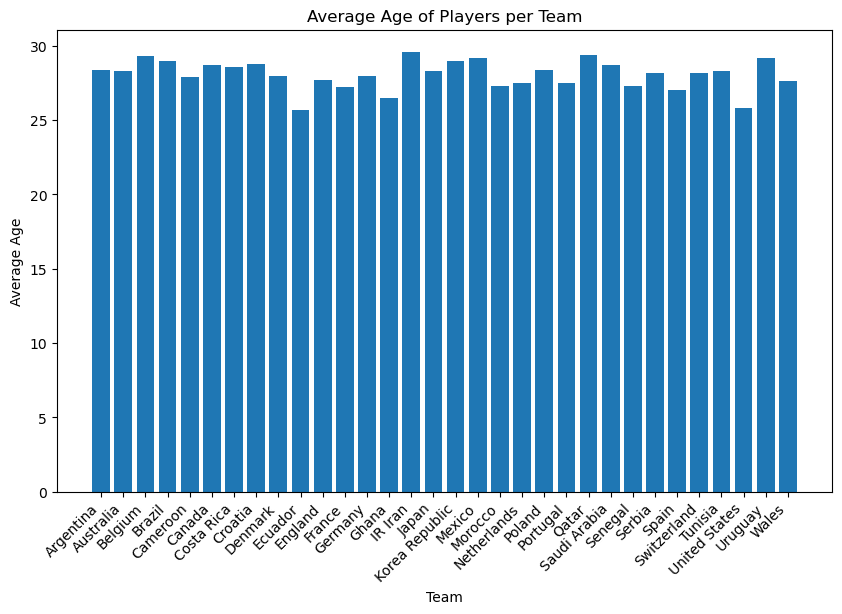

In [11]:
# Plot a bar chart for average age of players per team 
plt.figure(figsize=(10, 6))
plt.bar(players_age_per_team['team'], players_age_per_team['avg age per team'])
plt.title('Average Age of Players per Team')
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.xticks(rotation=45, ha='right') 
plt.show()

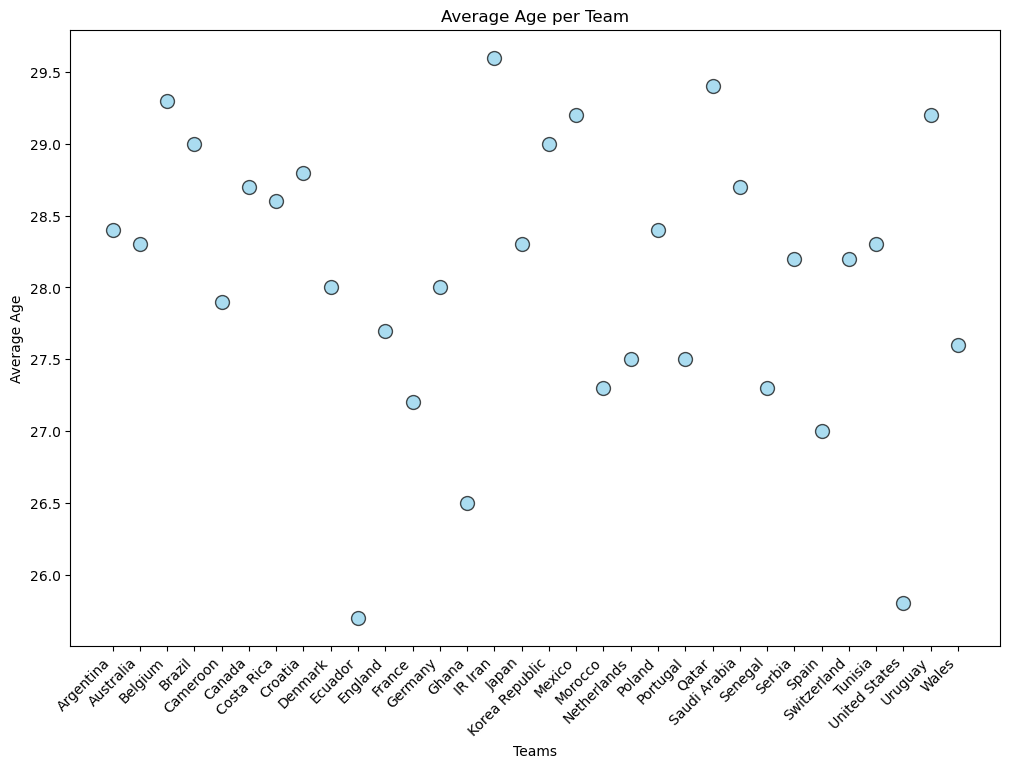

In [12]:
# Define variables for players_age_per_team with columns 'team' and 'avg age per team'
teams = players_age_per_team['team']
avg_age_per_team = players_age_per_team['avg age per team']

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(teams, avg_age_per_team, color='skyblue', edgecolors='black', s=100, alpha=0.7)
plt.xlabel('Teams')
plt.ylabel('Average Age')
plt.title('Average Age per Team')
plt.xticks(rotation=45, ha='right')  # Rotate team names for better readability

# Show the scatter plot with the regression line
plt.show()

**Average Age of Players per Position and Team**

In [13]:
# Calculate the average age of players per position and per team
players_age_per_position_team = merged_df_complete.groupby(['position', 'team'])['age'].mean().round(1).reset_index()

# Rename age column
players_age_per_position_team = players_age_per_position_team.rename(columns={'age': 'avg age per position'})
pd.set_option('display.max_rows', None)

# Display the result
players_age_per_position_team

,position,team,avg age per position
0,DF,Argentina,28.4
1,DF,Australia,27.7
2,DF,Belgium,31.6
3,DF,Brazil,31.8
4,DF,Cameroon,27.3
5,DF,Canada,27.8
6,DF,Costa Rica,30.0
7,DF,Croatia,26.4
8,DF,Denmark,27.2
9,DF,Ecuador,24.0


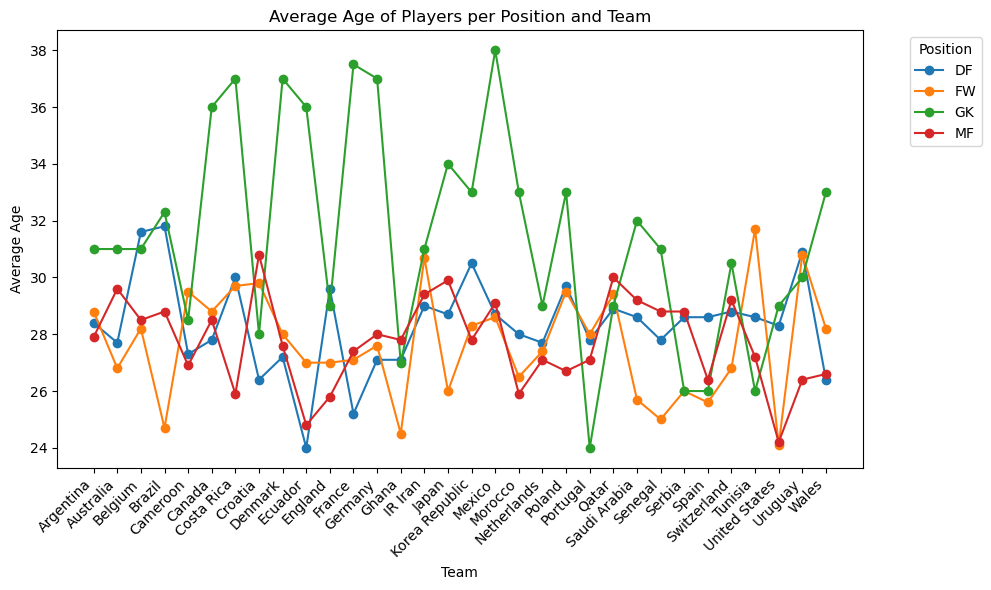

In [14]:
# Plot a line graph for average age of players per position and team 
plt.figure(figsize=(10,6))

# Iterate over each unique position
for position in players_age_per_position_team['position'].unique():
    position_data = players_age_per_position_team[players_age_per_position_team['position'] == position]
    plt.plot(position_data['team'], position_data['avg age per position'], label=position, marker='o')


plt.title('Average Age of Players per Position and Team')
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [15]:
# Calculate the average age of players per position and per team
players_age_per_position_team = players_age_per_position_team.groupby(['position', 'team'])['avg age per position'].mean().round(1).reset_index()

# Calculate the total average age per position
total_average_age_per_position = players_age_per_position_team.groupby('position')['avg age per position'].mean().round(1).reset_index()

# Display the result
total_average_age_per_position

,position,avg age per position
0,DF,28.3
1,FW,27.7
2,GK,31.4
3,MF,27.8


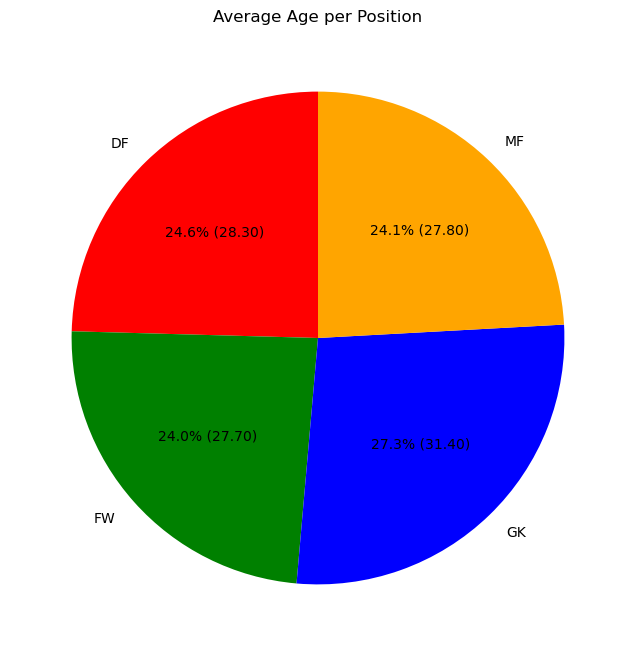

In [16]:
# Plot a pie graph for average age of players per position 
positions = ['DF', 'FW', 'GK', 'MF']
avg_age = [28.3, 27.7, 31.4, 27.8]

# Plotting
fig, ax = plt.subplots(figsize=(8, 8))
colors = ["red", "green", "blue", "orange"]

# Labeling
ax.pie(avg_age, labels=positions, autopct=lambda p: f'{p:.1f}% ({p * sum(avg_age) / 100:.2f})',
       startangle=90, colors=colors)
ax.set_title('Average Age per Position')

# Show the pie chart
plt.show()

- The red slice represents the average age of defenders at 28.3 years old. The percentage value of 24.6% on the slice indicates the proportion of the total average age that defenders contribute. 

- The green slice represents the average age of forwards at 27.7 years old. The percentage value of 24.0% on the slice indicates the proportion of the total average age that forwards contribute. 

- The blue slice represents the average age of goalkeepers at 31.40. The percentage value of 27.3% on the slice indicates the proportion of the total average age that goalkeepers contribute. 

- The orange slice represents the average age of midfielders at 27.8 years old. The percentage value of 24.1% on the slice indicates the proportion of the total average age that midfielders contribute. 

In [34]:
# Calculate total goals per team 
total_goals_per_team = merged_df_complete.groupby('team')['goals'].sum()

# Convert SeriesGroupBy to df
total_goals_per_team = total_goals_per_team.reset_index()

# Rename column to show results 
total_goals_per_team = total_goals_per_team.rename(columns={'goals': 'total goals per team'})

# Display the result
print(total_goals_per_team)

              team  total goals per team
0        Argentina                    15
1        Australia                     3
2          Belgium                     1
3           Brazil                     8
4         Cameroon                     4
5           Canada                     1
6       Costa Rica                     3
7          Croatia                     8
8          Denmark                     1
9          Ecuador                     4
10         England                    13
11          France                    16
12         Germany                     6
13           Ghana                     5
14         IR Iran                     4
15           Japan                     5
16  Korea Republic                     5
17          Mexico                     2
18         Morocco                     6
19     Netherlands                    10
20          Poland                     3
21        Portugal                    12
22           Qatar                     1
23    Saudi Arab

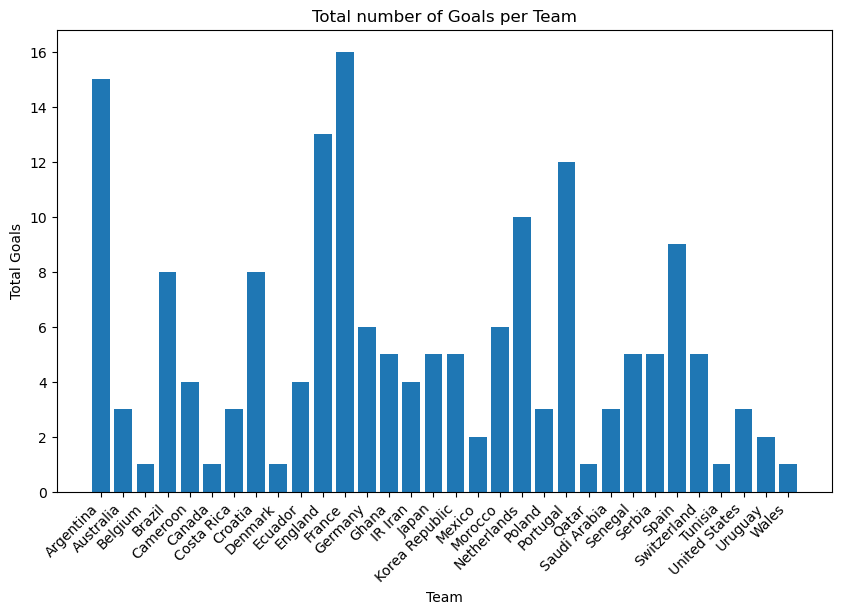

In [28]:
#plot the data via bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_goals_per_team['team'], total_goals_per_team['total goals per team'])
plt.title('Total number of Goals per Team')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=45, ha='right') 
plt.show()


In [29]:
# Calculate total assists per team 
total_assists_per_team = merged_df_complete.groupby('team')['assists'].sum()

# Convert SeriesGroupBy to df
total_assists_per_team = total_assists_per_team.reset_index()

# Rename column to show results 
total_assists_per_team = total_assists_per_team.rename(columns={'assists':'total assists per team'})

# Display the result
print(total_assists_per_team)

              team  total assists per team
0        Argentina                       8
1        Australia                       3
2          Belgium                       1
3           Brazil                       6
4         Cameroon                       4
5           Canada                       1
6       Costa Rica                       1
7          Croatia                       8
8          Denmark                       1
9          Ecuador                       2
10         England                      11
11          France                      12
12         Germany                       5
13           Ghana                       2
14         IR Iran                       2
15           Japan                       4
16  Korea Republic                       3
17          Mexico                       1
18         Morocco                       4
19     Netherlands                       8
20          Poland                       1
21        Portugal                      10
22         

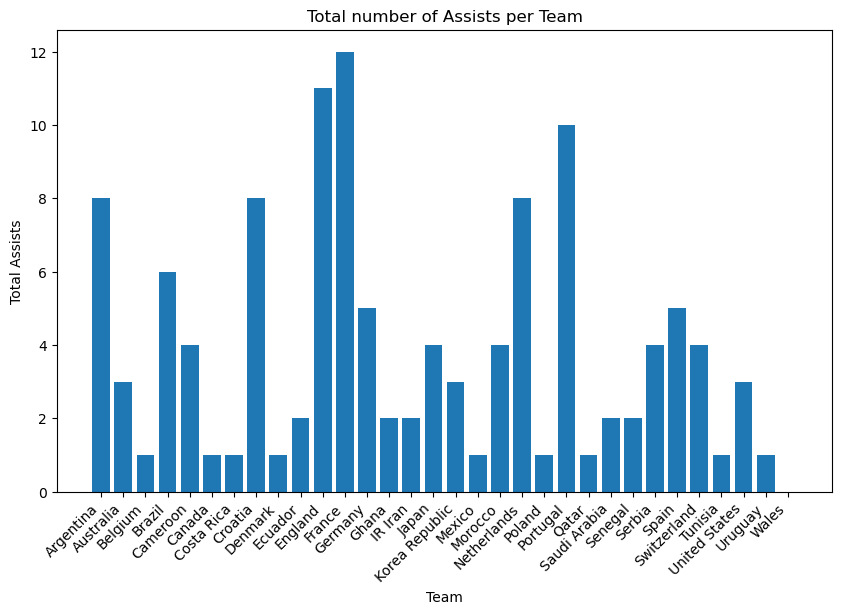

In [30]:
#plot the data via bar graph
plt.figure(figsize=(10, 6))
plt.bar(total_assists_per_team['team'], total_assists_per_team['total assists per team'])
plt.title('Total number of Assists per Team')
plt.xlabel('Team')
plt.ylabel('Total Assists')
plt.xticks(rotation=45, ha='right') 
plt.show()

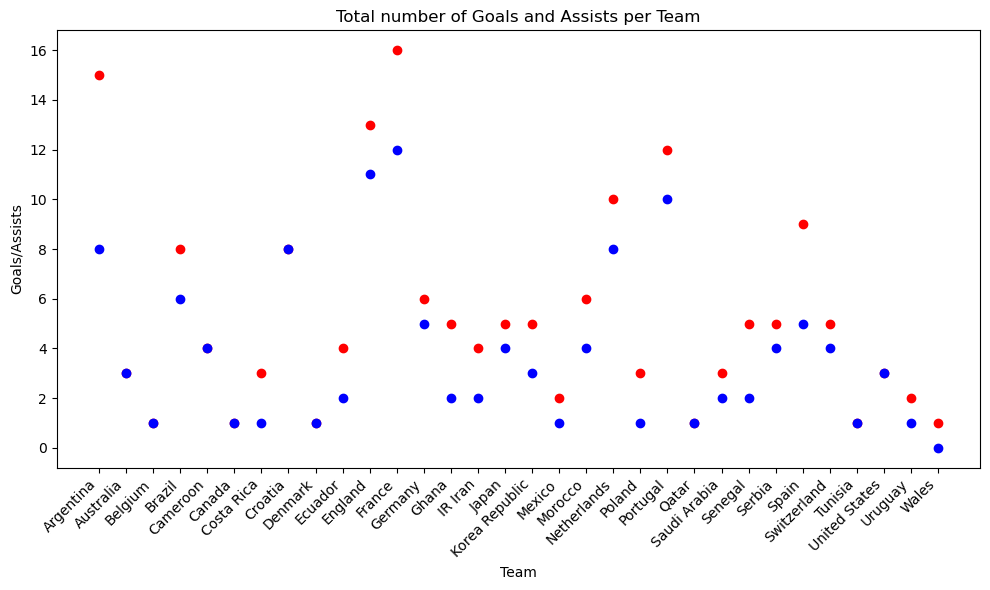

In [31]:
plt.figure(figsize=(10, 6))

teams = total_goals_per_team['team'].unique()

# Plotting total goals and total assists for each team
for team in teams:
    goals_data = total_goals_per_team[total_goals_per_team['team'] == team]
    assists_data = total_assists_per_team[total_assists_per_team['team'] == team]

    plt.plot(goals_data['team'], goals_data['total goals per team'], label=f'{team} - Total Goals', marker='o', color='red')
    plt.plot(assists_data['team'], assists_data['total assists per team'], label=f'{team} - Total Assists', marker='o', color='blue')

plt.title('Total number of Goals and Assists per Team')
plt.xlabel('Team')
plt.ylabel('Goals/Assists')

# Combine both legends into a single legend


plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [32]:
# Calculate summary statistics for each team
team_summary = merged_df_complete.groupby('team').agg({
    'games_starts': 'sum',
    'minutes': 'sum'})

team_summary['Starters_per_team'] = team_summary['minutes'] / 90
team_summary['Starters_per_team'] = team_summary['Starters_per_team'].round()

print("Summary Statistics for Each Team:")
print(team_summary)

Summary Statistics for Each Team:
                games_starts  minutes  Starters_per_team
team                                                    
Argentina                 77     7590               84.0
Australia                 44     3960               44.0
Belgium                   33     2970               33.0
Brazil                    55     5280               59.0
Cameroon                  33     2969               33.0
Canada                    33     2970               33.0
Costa Rica                33     2970               33.0
Croatia                   77     7590               84.0
Denmark                   33     2970               33.0
Ecuador                   33     2970               33.0
England                   55     4950               55.0
France                    77     7260               81.0
Germany                   33     2970               33.0
Ghana                     33     2970               33.0
IR Iran                   33     2970               33

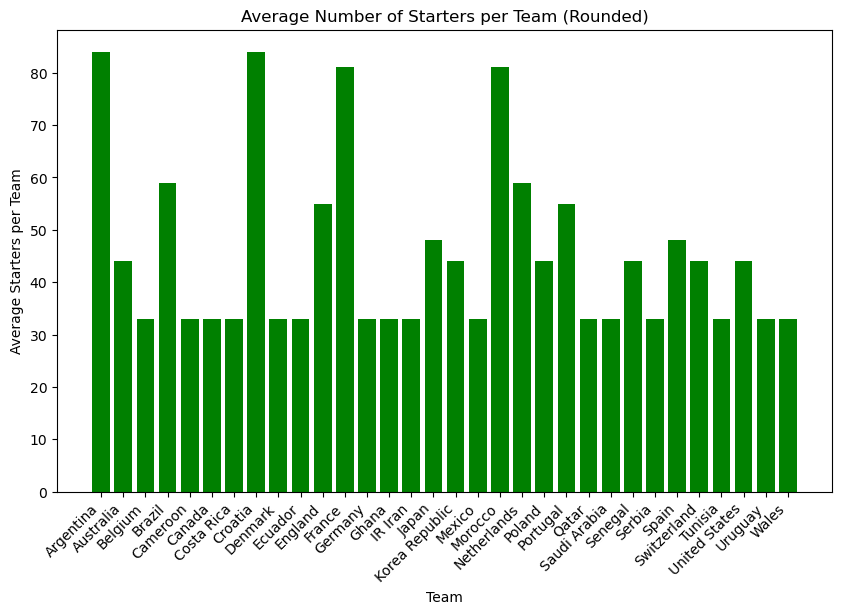

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(team_summary.index, team_summary['Starters_per_team'], color='green')
plt.title('Average Number of Starters per Team (Rounded)')
plt.xlabel('Team')
plt.ylabel('Average Starters per Team')
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
#Calculate average age of starter per team
average_age_per_starter = merged_df_complete[merged_df_complete['games_starts'] > 0].groupby('team')['age'].mean()

#Show avg age per starter in descending order
average_age_per_starter.sort_values(ascending=False).round(2)

team
Belgium           30.62
Uruguay           30.00
Qatar             29.79
IR Iran           29.69
Mexico            29.67
Costa Rica        29.44
Canada            29.13
Korea Republic    28.88
Wales             28.86
Argentina         28.83
Australia         28.79
Saudi Arabia      28.75
Croatia           28.74
Brazil            28.73
Japan             28.67
Switzerland       28.53
Tunisia           28.47
Senegal           28.38
Serbia            28.14
Denmark           28.12
Germany           28.07
Cameroon          28.06
Netherlands       28.00
Poland            27.93
Portugal          27.62
Morocco           27.59
France            27.55
England           27.53
Ghana             27.14
Spain             26.88
Ecuador           26.43
United States     25.64
Name: age, dtype: float64

In [36]:
#Calculate the average starter's age
starter_age=average_age_per_starter.mean()

#show new df
starter_age.round(2)

28.4

In [37]:
#Calculate average age per sub player
average_age_per_sub = merged_df_complete[merged_df_complete['games_subs'] > 0].groupby('team')['age'].mean()

#Show average age per sub
average_age_per_sub.sort_values(ascending=False).round(2)

team
Qatar             29.50
Tunisia           29.33
Canada            29.09
IR Iran           29.00
Uruguay           28.90
Brazil            28.67
Saudi Arabia      28.50
Croatia           28.38
Cameroon          28.11
Serbia            28.09
England           28.09
Portugal          28.00
Korea Republic    28.00
Australia         27.60
Mexico            27.57
Belgium           27.55
Japan             27.50
Netherlands       27.38
Poland            27.36
Argentina         27.12
Germany           27.00
Switzerland       27.00
Denmark           27.00
Spain             26.91
Morocco           26.71
Wales             26.70
Ghana             26.30
United States     26.22
Senegal           25.64
Costa Rica        25.50
France            25.43
Ecuador           24.14
Name: age, dtype: float64

In [38]:
#calculate the average age of a substitute player
sub_player_age= average_age_per_sub.mean()

#show average age of a sub player
sub_player_age.round(2)

27.45

In [39]:
#difference of starter age vs sub age
start_vs_sub= starter_age - sub_player_age

#show difference
start_vs_sub.round(2)

0.95

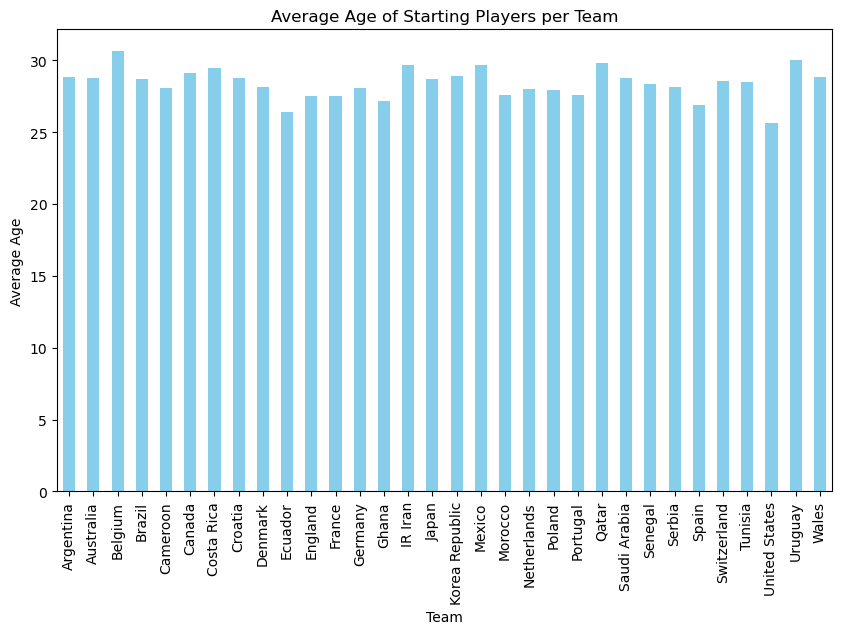

In [40]:
#Plot a bar graph with of the avergage age per starter on each team
average_age_per_starter.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Add title, x and y axis
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.title('Average Age of Starting Players per Team')

# Show the bar graph
plt.show()


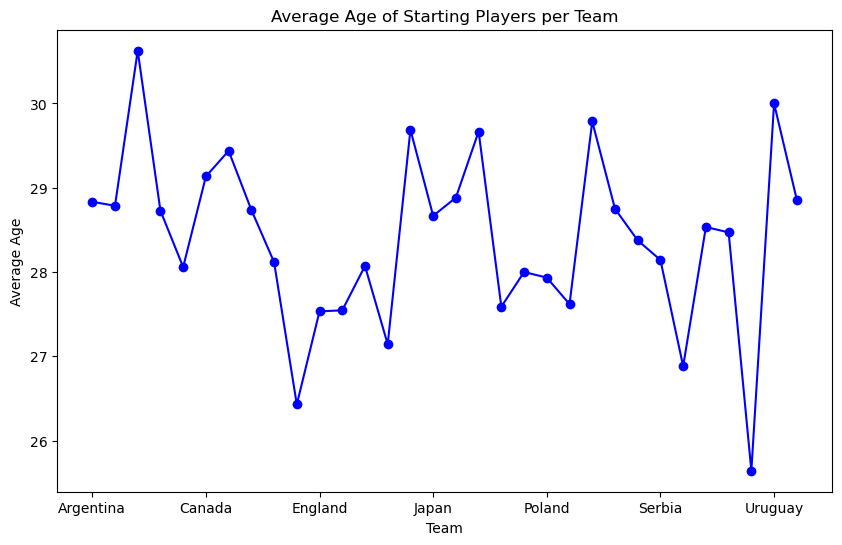

In [41]:
#Plot a line graph of the average age per starter on each team
average_age_per_starter.plot(x='team', y='age', kind='line', marker='o', linestyle='-', color='b', figsize=(10, 6))

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.title('Average Age of Starting Players per Team')

# Show the plot
plt.show()

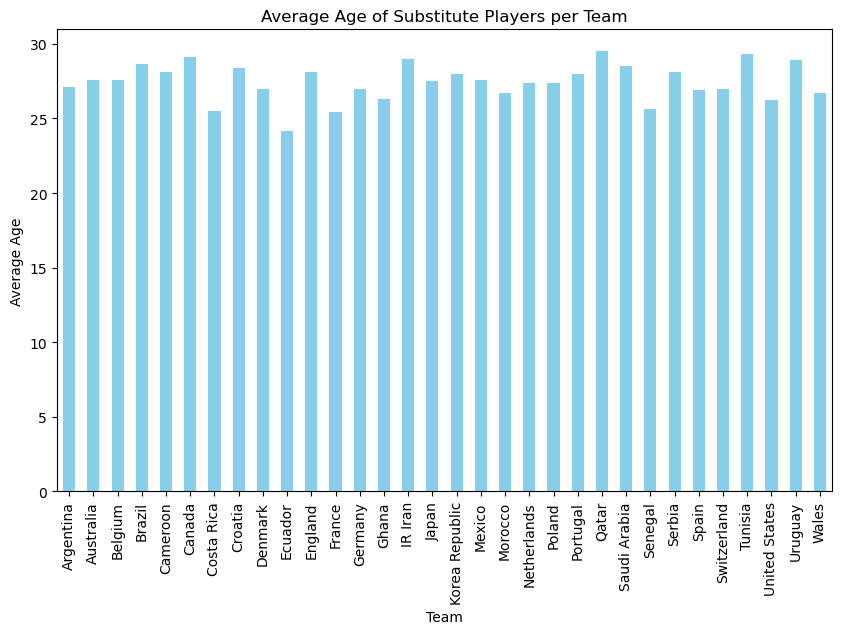

In [42]:
#Plot a bar graph with of the avergage age per substitute player on each team
average_age_per_sub.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Add title, x and y axis
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.title('Average Age of Substitute Players per Team')

# Show the bar graph
plt.show()

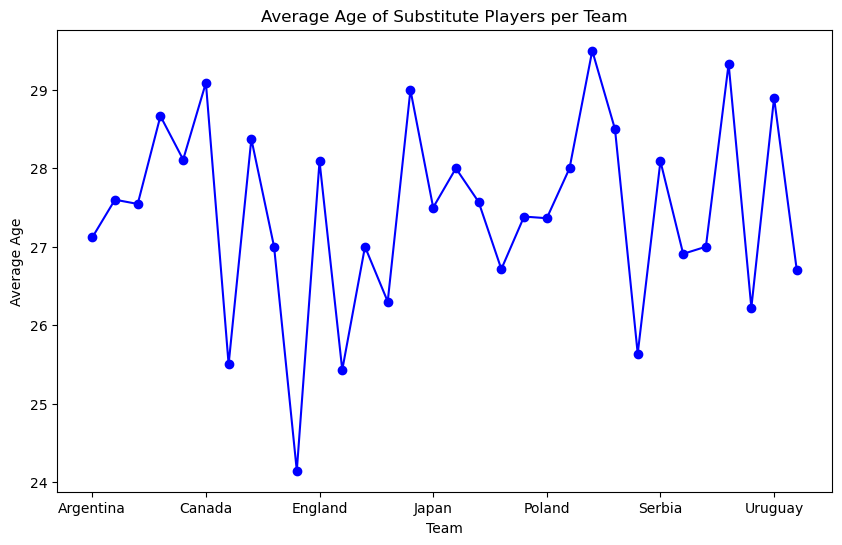

In [43]:
#Plot a line graph of the average age per substitute player on each team
average_age_per_sub.plot(x='team', y='age', kind='line', marker='o', linestyle='-', color='b', figsize=(10, 6))

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.title('Average Age of Substitute Players per Team')

# Show the plot
plt.show()

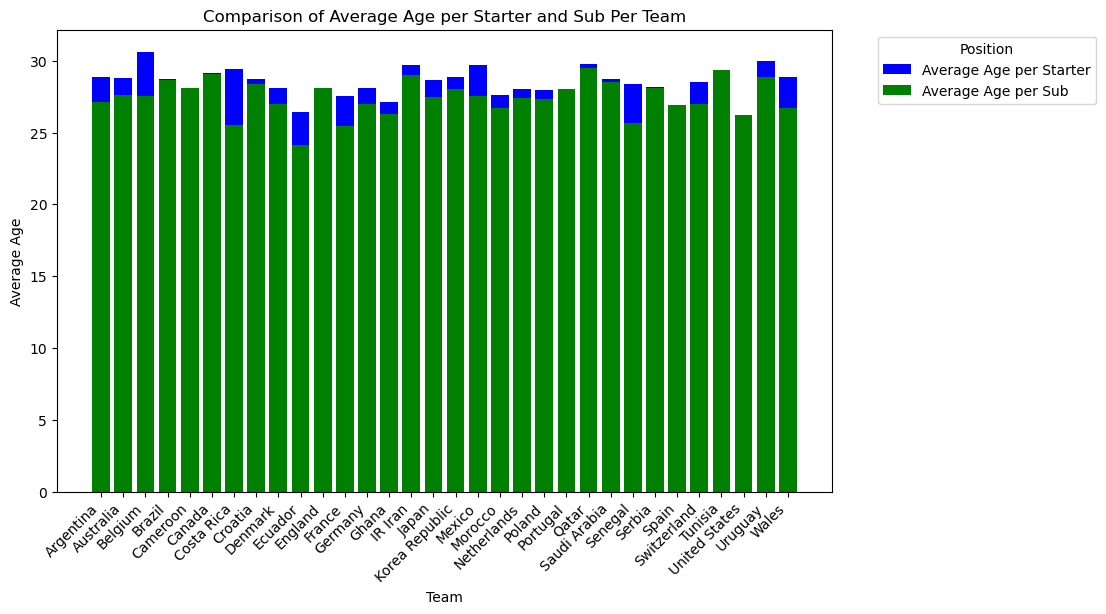

In [44]:
#Create a bar graph comparison of the average age of starters and substitutes via bar graph
plt.figure(figsize=(10, 6))

# Bar graph for Average Age per Starter
plt.bar(average_age_per_starter.index, average_age_per_starter, label='Average Age per Starter', color='blue')

# Bar graph for Average Age per Sub
plt.bar(average_age_per_sub.index, average_age_per_sub, label='Average Age per Sub', color='green')

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Average Age')
plt.title('Comparison of Average Age per Starter and Sub Per Team')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [45]:
birth_year_goals = merged_df_complete.iloc[:,[0,5, 10,]].copy()
birth_year_goals

,player,birth_year,goals
0,Aaron Mooy,1990,0
1,Aaron Ramsey,1990,0
2,Abdelhamid Sabiri,1996,0
3,Abdelkarim Hassan,1993,0
4,Abderrazak Hamdallah,1990,0
5,Abdessamad Ezzalzouli,2001,0
6,Abdou Diallo,1996,0
7,Abdul Fatawu Issahaku,2004,0
8,Abdulaziz Hatem,1990,0
9,Abdulelah Al-Amri,1997,0


In [46]:
#Count number of players that didn't score goals
zero_goals = birth_year_goals['goals'].value_counts()[0]

print(f"{zero_goals} players scored zero goals.")

563 players scored zero goals.


In [47]:
#Drop players that had zero goals
goal_scorers = birth_year_goals.drop(birth_year_goals[birth_year_goals['goals'] == 0].index)
goal_scorers

,player,birth_year,goals
14,Achraf Dari,1999,1
16,Adrien Rabiot,1995,1
25,Aleksandar Mitrović,1994,2
30,Alexis Mac Allister,1998,1
45,Alphonso Davies,2000,1
49,Andreas Christensen,1996,1
52,Andrej Kramarić,1991,2
55,André Ayew,1989,1
69,Ao Tanaka,1998,1
76,Aurélien Tchouaméni,2000,1


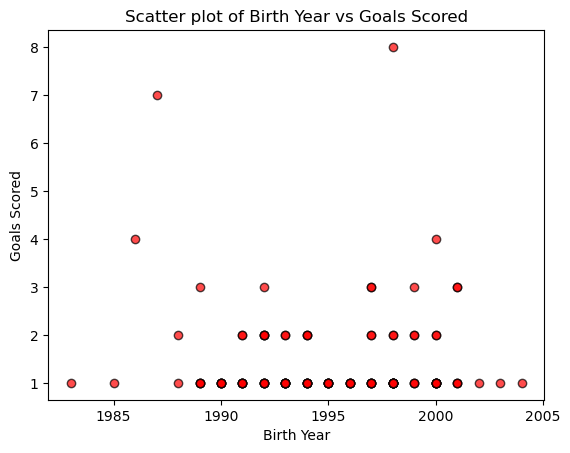

In [48]:
#Plot graph of year of birth vs goals scored
plt.scatter(goal_scorers['birth_year'], goal_scorers['goals'], edgecolors="black", facecolors="red", 
            alpha=0.7)
plt.xlabel("Birth Year")
plt.ylabel("Goals Scored")
plt.title("Scatter plot of Birth Year vs Goals Scored")
plt.show()

# Analysis

The darker "red markers" indicate that multiple goal scorers were born on those respective years. There is a larger concentration of goal scorers who only scored one goal scattered across multiple years. There is no direct correlation between the year a player was born and the number of goals they scored

In [49]:
#Find number of players and the amount of goals they scored
year_goals_count=goal_scorers.groupby(["goals"])["player"].count().reset_index()
year_goals_count

,goals,player
0,1,86
1,2,20
2,3,7
3,4,2
4,7,1
5,8,1


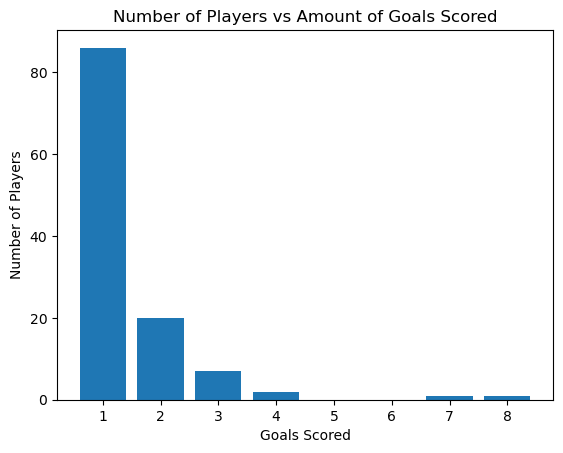

In [50]:
# Plot a bar chart for players who scored goals

plt.bar(year_goals_count['goals'], year_goals_count['player'])
plt.title('Number of Players vs Amount of Goals Scored')
plt.xlabel('Goals Scored')
plt.ylabel('Number of Players')
plt.show()

# Analysis

7 and 8 goals were scored by one player each. Whereas 86 players scored 1 goal each. This shows that the more goals that are scored the fewer the number of players that will score. No players scored 5 or 6 goals.

In [51]:
#Find oldest and youngest goal scorers
goal_scorers['birth_year'].agg(['min', 'max'])

min    1983
max    2004
Name: birth_year, dtype: int64

In [52]:
#Create labels bins
bins = [1982, 1986, 1989, 1992, 1995, 1998, 2001, 2004]

labels =["1983-1986", "1987-1989", "1990-1992", "1993-1995", "1996-1998", "1999-2001", "2002-2004"]

In [53]:
#Copy dataframe
scorer_group=goal_scorers.copy()

#Use `pd.cut` to categorize birth year based on the bins.
scorer_group["Range of goal scorers"] = pd.cut(scorer_group["birth_year"], bins, labels=labels)
scorer_group

,player,birth_year,goals,Range of goal scorers
14,Achraf Dari,1999,1,1999-2001
16,Adrien Rabiot,1995,1,1993-1995
25,Aleksandar Mitrović,1994,2,1993-1995
30,Alexis Mac Allister,1998,1,1996-1998
45,Alphonso Davies,2000,1,1999-2001
49,Andreas Christensen,1996,1,1996-1998
52,Andrej Kramarić,1991,2,1990-1992
55,André Ayew,1989,1,1987-1989
69,Ao Tanaka,1998,1,1996-1998
76,Aurélien Tchouaméni,2000,1,1999-2001


In [54]:
#Calculating sums for ranges 
group_count = scorer_group.groupby(["Range of goal scorers"])["player"].count()
goals_sum = scorer_group.groupby(["Range of goal scorers"])["goals"].sum()

In [55]:
#Count goal scorers per age range
group_count

Range of goal scorers
1983-1986     3
1987-1989     8
1990-1992    25
1993-1995    27
1996-1998    29
1999-2001    22
2002-2004     3
Name: player, dtype: int64

In [56]:
#Count the total number of goals scored per age range
goals_sum

Range of goal scorers
1983-1986     6
1987-1989    17
1990-1992    33
1993-1995    32
1996-1998    44
1999-2001    35
2002-2004     3
Name: goals, dtype: int64

In [57]:
#Create summary dataframe
scoring_summary = pd.DataFrame({"No. of Goals Scorers": group_count,
                                 "Sum of Goal Scored": goals_sum})
scoring_summary

,No. of Goals Scorers,Sum of Goal Scored
Range of goal scorers,,
1983-1986,3,6
1987-1989,8,17
1990-1992,25,33
1993-1995,27,32
1996-1998,29,44
1999-2001,22,35
2002-2004,3,3


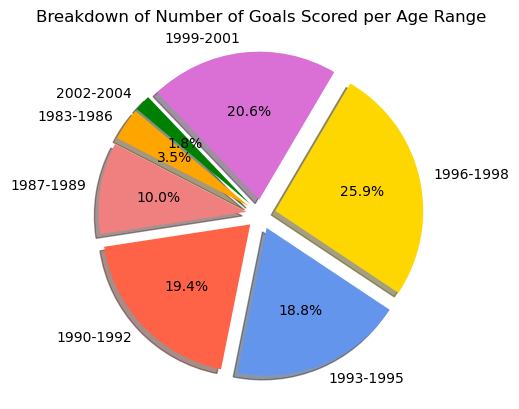

In [58]:
# Labels for the sections of our pie chart
labels = goals_sum.index.values

# The values of each section of the pie chart
sizes = goals_sum.values

# The colors of each section of the pie chart
colors = ["orange", "lightcoral",  'tomato', 'cornflowerblue', 'gold', 'orchid', 'green']

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Breakdown of Number of Goals Scored per Age Range")
plt.show()

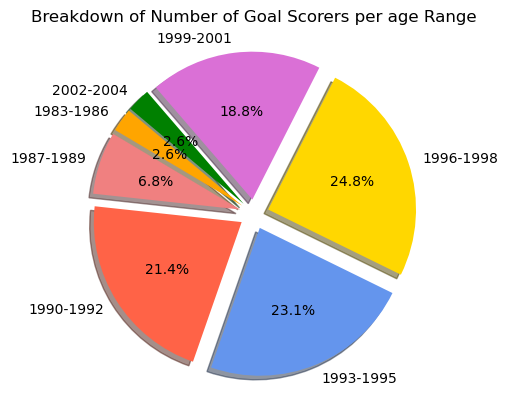

In [59]:
# Labels for the sections of our pie chart
labels = group_count.index.values

# The values of each section of the pie chart
sizes = group_count.values

# The colors of each section of the pie chart
colors = ["orange", "lightcoral",  'tomato', 'cornflowerblue', 'gold', 'orchid', 'green']

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Breakdown of Number of Goal Scorers per age Range")

plt.show()

# Analysis

The youngest age group contributed the least amount of goals (2002-2004, 3 goals), 1.8%. The group with the most amount of goals was 1996-1998, 25.9%. (44 goals)

The youngest and oldest age groups had the least number of goal scorer contributions. This would be indicative of these age groups playing the least amount of time, 2.6%. (1983-86, 2002-04,) 3 players each.

The “peak” playing time for these players contributed the largest amount of goal scorers, 24.8%. (1996-1998, 29 players).

In [60]:
# Total Number of yellow cards per country
# Calculate the total number of players given yellow cards per team 
# Filter out players with 0 yellow cards
filtered_cards_0_df = merged_df_complete[merged_df_complete['cards_yellow'] > 0]
players_yellow_cards_per_team = filtered_cards_0_df.groupby('team')['cards_yellow'].count().round(1).reset_index()

# Rename cards_yellow column
players_yellow_cards_per_team = players_yellow_cards_per_team.rename(columns={'cards_yellow': 'total yellow carded players per country'})

# Display the result
players_yellow_cards_per_team

,team,total yellow carded players per country
0,Argentina,10
1,Australia,5
2,Belgium,4
3,Brazil,6
4,Cameroon,6
5,Canada,8
6,Costa Rica,5
7,Croatia,7
8,Denmark,5
9,Ecuador,2


In [63]:
yellow_cards_total_df = players_yellow_cards_per_team['total yellow carded players per country'].sum()

print("Total # of Players given Yellow Cards:", yellow_cards_total_df)

Total # of Players given Yellow Cards: 195


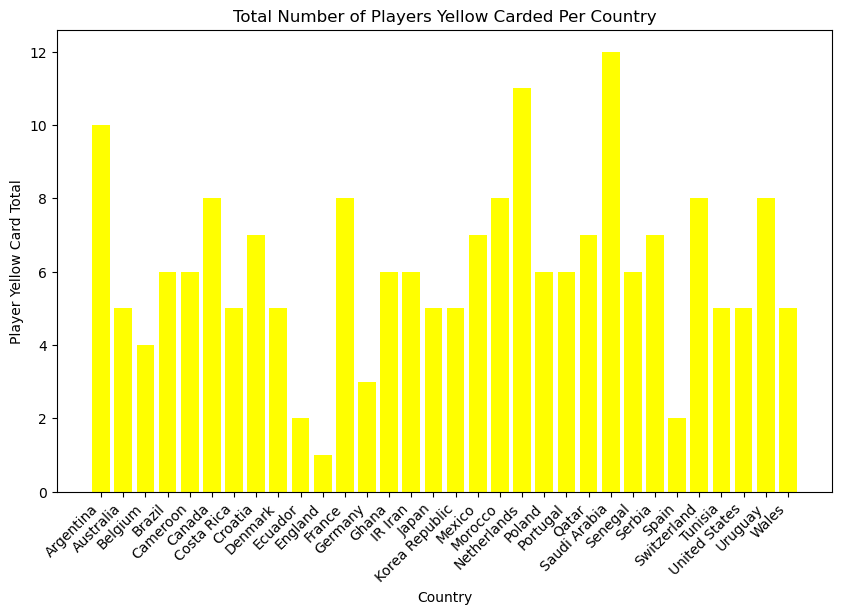

In [65]:
# Plot a bar chart for total number of players per team receiving a yellow card
plt.figure(figsize=(10, 6))
plt.bar(players_yellow_cards_per_team['team'], players_yellow_cards_per_team['total yellow carded players per country'],facecolor='yellow')
plt.title('Total Number of Players Yellow Carded Per Country')
plt.xlabel('Country')
plt.ylabel('Player Yellow Card Total')
plt.xticks(rotation=45, ha='right') 
plt.show()

In [66]:
#Player,Age,yellow card count
player_yellow_card_df = merged_df_complete[['player', 'cards_yellow','age']]
#Display DF
player_yellow_card_df

,player,cards_yellow,age
0,Aaron Mooy,1,33
1,Aaron Ramsey,1,33
2,Abdelhamid Sabiri,1,27
3,Abdelkarim Hassan,0,30
4,Abderrazak Hamdallah,0,33
5,Abdessamad Ezzalzouli,0,22
6,Abdou Diallo,0,27
7,Abdul Fatawu Issahaku,0,19
8,Abdulaziz Hatem,0,33
9,Abdulelah Al-Amri,2,26


In [67]:
# Calculate the average age of players per yellow card count
Average_players_age_per_yellow_card_count = player_yellow_card_df.groupby('cards_yellow')['age'].mean().round(1).reset_index()


Average_players_age_per_yellow_card_count

,cards_yellow,age
0,0,27.9
1,1,28.6
2,2,28.4
3,3,29.0


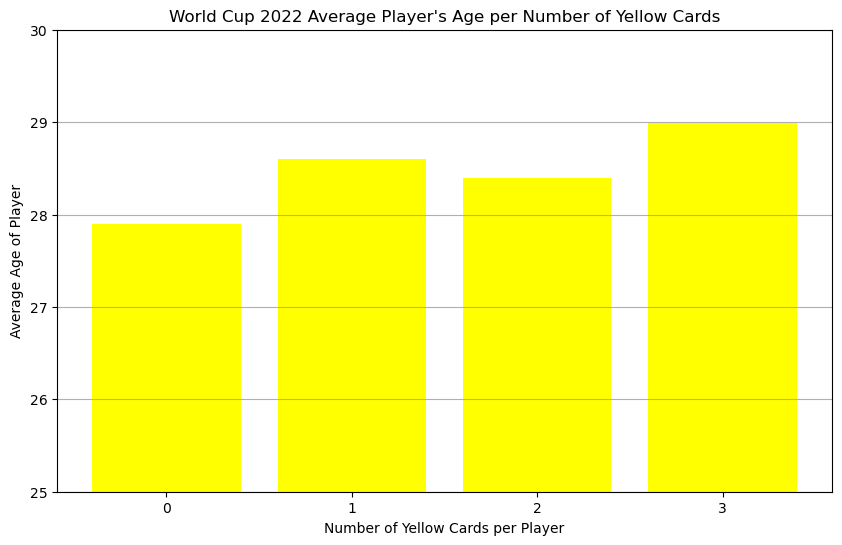

Number of players with at least one yellow card: 195


In [69]:
#Plot graph of average age of players per yellow card count
plt.figure(figsize=(10, 6))
plt.bar(Average_players_age_per_yellow_card_count['cards_yellow'], Average_players_age_per_yellow_card_count['age'], facecolor='yellow')
plt.grid(axis='y')
plt.title("World Cup 2022 Average Player's Age per Number of Yellow Cards")
plt.xlabel('Number of Yellow Cards per Player')
plt.ylabel('Average Age of Player')
plt.xticks(np.arange(0, 4, 1))
plt.ylim(25, 30)
plt.show()
print("Number of players with at least one yellow card:", yellow_cards_total_df)

In [70]:
#Find out how many players received at least one yellow card
players_with_yellow_card = player_yellow_card_df['cards_yellow'].gt(0).sum()                                                                   
                                                                   
print("Number of players with at least one yellow card:", players_with_yellow_card)

Number of players with at least one yellow card: 195


In [71]:
#Player,Age,red card count
player_red_card_df = merged_df_complete[['player', 'cards_red','age']]

#Display DF
player_red_card_df

,player,cards_red,age
0,Aaron Mooy,0,33
1,Aaron Ramsey,0,33
2,Abdelhamid Sabiri,0,27
3,Abdelkarim Hassan,0,30
4,Abderrazak Hamdallah,0,33
5,Abdessamad Ezzalzouli,0,22
6,Abdou Diallo,0,27
7,Abdul Fatawu Issahaku,0,19
8,Abdulaziz Hatem,0,33
9,Abdulelah Al-Amri,0,26


In [72]:
# Calculate the average age of players per red card count
Average_players_age_per_red_card_count = player_red_card_df.groupby('cards_red')['age'].mean().round(1).reset_index()

#print DF
Average_players_age_per_red_card_count

,cards_red,age
0,0,28.1
1,1,29.8


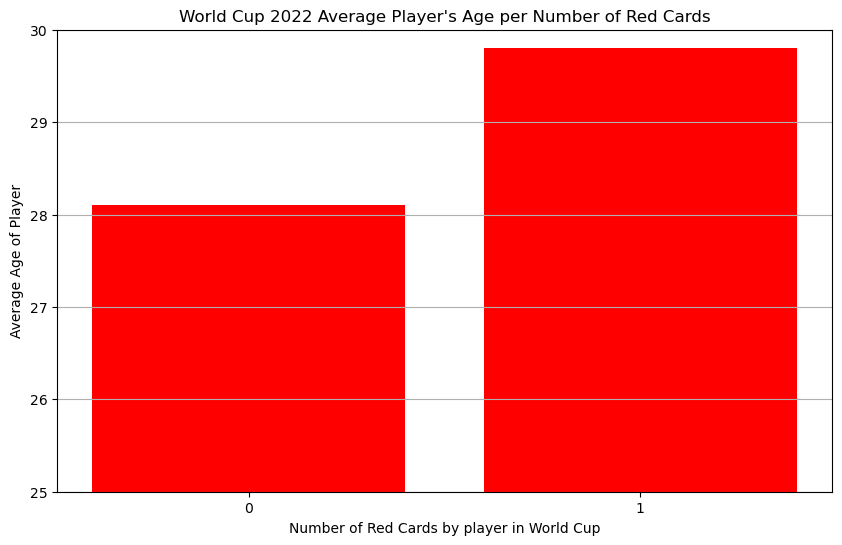

Total number of players given red cards: 4


In [73]:
#Plot graph of average age of players per red card count
plt.figure(figsize=(10, 6))
plt.bar(Average_players_age_per_red_card_count['cards_red'], Average_players_age_per_red_card_count['age'],facecolor='red')
plt.grid(axis='y')
plt.title("World Cup 2022 Average Player's Age per Number of Red Cards")
plt.xlabel('Number of Red Cards by player in World Cup')
plt.ylabel('Average Age of Player')
plt.xticks(np.arange(0, 2, 1))
plt.ylim(25, 30)

plt.show()
print("Total number of players given red cards: 4")

In [74]:
#Total number of players receiving a red card
total_red_cards = player_red_card_df['cards_red'].sum()
print("Total Red Cards:", total_red_cards)

Total Red Cards: 4
